In [1]:
from sklearn.linear_model import LinearRegression


In [2]:
import numpy as np

In [12]:
x = np.random.normal(165, 30, size=500)

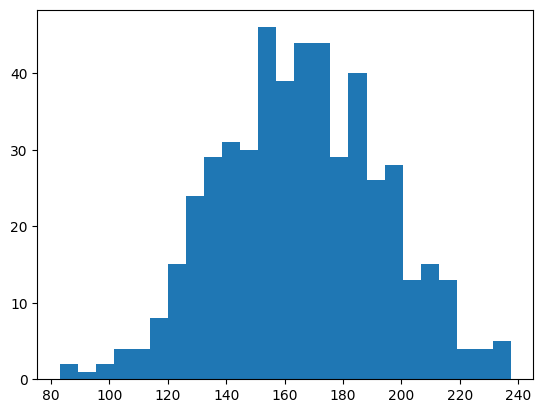

In [13]:
import matplotlib.pyplot as plt

plt.hist(x, bins=25);

In [19]:
m = 0.3
q = 20
y = m * x + q + np.random.normal(0, 5, size=500)

(array([  4.,  14.,  27.,  84., 114.,  95.,  85.,  51.,  20.,   6.]),
 array([40.30001915, 45.98216749, 51.66431584, 57.34646418, 63.02861252,
        68.71076086, 74.3929092 , 80.07505754, 85.75720589, 91.43935423,
        97.12150257]),
 <BarContainer object of 10 artists>)

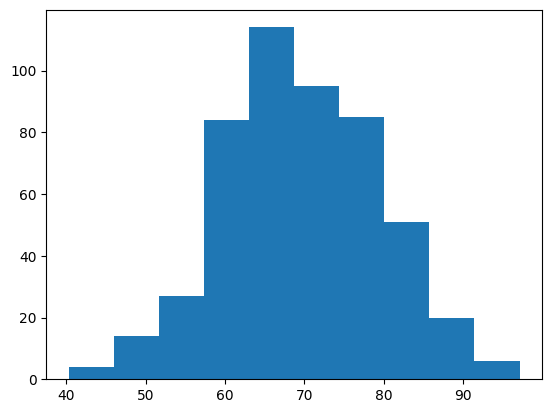

In [20]:
plt.hist(y)

In [74]:
y.mean()

69.68337078535464

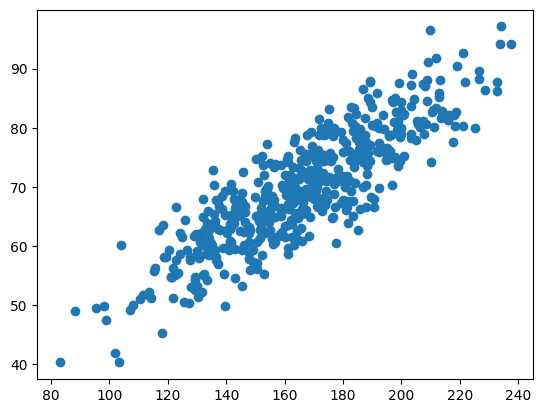

In [21]:
plt.scatter(x, y)

In [22]:
lr = LinearRegression()

In [28]:
x.reshape(-1, 1).shape

(500, 1)

In [25]:
y.shape

(500,)

In [29]:
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [ ]:
# y = mx + q

In [30]:
lr.intercept_

19.89481383245461

In [31]:
lr.coef_

array([0.30018579])

In [32]:
x_retta = np.linspace(80, 240, 120)
y_retta = lr.coef_[0] * x_retta + lr.intercept_

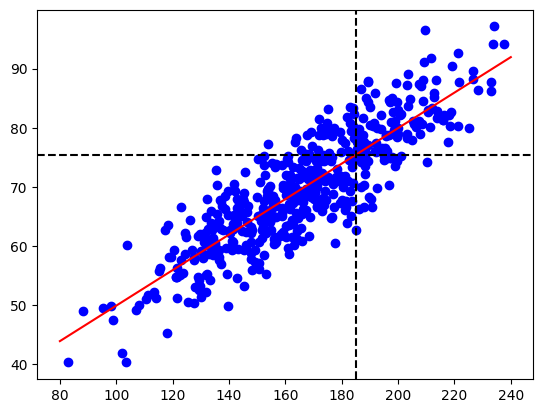

In [45]:
plt.scatter(x, y, c='b')
plt.plot(x_retta, y_retta, c='r')

plt.axvline(185, ls='--', c='k')
plt.axhline(75.42918422, ls='--', c='k')

# plt.plot(np.sort(x), y[np.argsort(x)], c='y')

In [37]:
lr.coef_[0] * 185 + lr.intercept_

75.42918421550942

In [38]:
lr.predict([[185]])

array([75.42918422])

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [42]:
r2_score(y, lr.predict(x.reshape(-1,1)))

0.7491282694696454

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, train_size=0.8)

In [55]:
X_train.shape

(400, 1)

In [56]:
X_test.shape

(100, 1)

In [57]:
y_train.shape

(400,)

In [58]:
y_test.shape

(100,)

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
r2_score(y_test, lr.predict(X_test))

0.7190100356721632

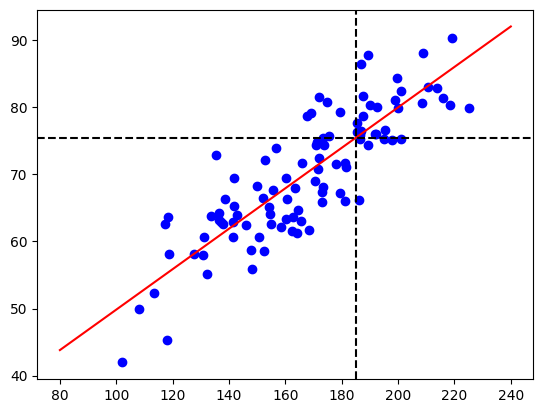

In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)
x_retta = np.linspace(80, 240, 120)
# y_retta = lr.coef_[0] * x_retta + lr.intercept_
y_retta = lr.predict(x_retta.reshape(-1,1))


plt.scatter(X_test, y_test, c='b')
plt.plot(x_retta, y_retta, c='r')

plt.axvline(185, ls='--', c='k')
plt.axhline(75.42918422, ls='--', c='k')

# plt.plot(np.sort(x), y[np.argsort(x)], c='y')

In [67]:

0.4 * 185 + lr.intercept_

93.66571002607941

In [65]:
lr.coef_[0]

0.30166279454247563

In [72]:
squared_errors = []
for coef_angolare in np.linspace(-1, 1, 100):
    pred = coef_angolare * 185 + lr.intercept_
    true = 75
    squared_errors.append((pred - true) ** 2)

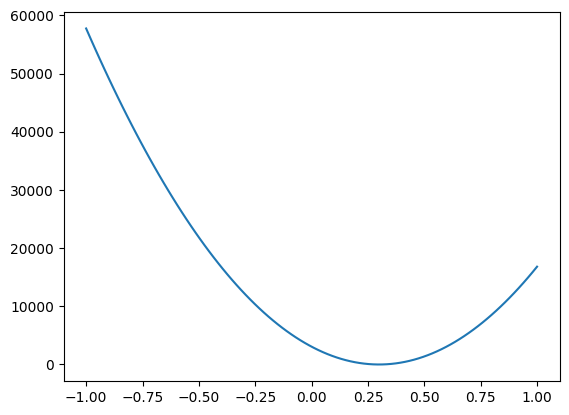

In [73]:
plt.plot(np.linspace(-1, 1, 100), squared_errors)

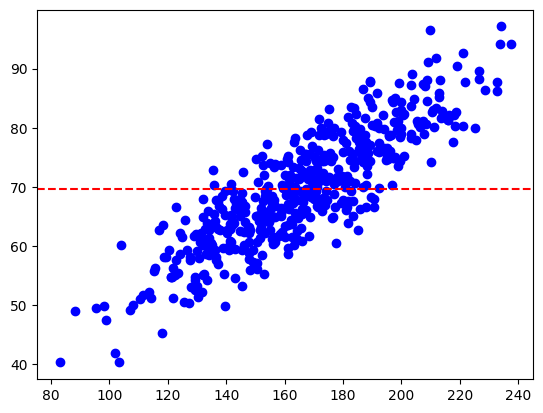

In [75]:
plt.scatter(x, y, c='b')

plt.axhline(y.mean(), ls='--', c='r')

# plt.plot(np.sort(x), y[np.argsort(x)], c='y')

In [76]:
y_pred = np.full(500, y.mean())

In [78]:
r2_score(y, y_pred)

0.0

In [79]:
y.var()

94.03136691174522

In [80]:
mean_squared_error(y, y_pred)

94.03136691174522

In [81]:
from sklearn.model_selection import cross_val_score

In [85]:
cross_val_score(LinearRegression(), x.reshape(-1,1), y, cv=5, scoring='r2').mean()

0.7359166681468549

In [86]:
from sklearn.model_selection import cross_val_predict

In [88]:
y_pred = cross_val_predict(LinearRegression(), x.reshape(-1, 1), y, cv=5)

In [89]:
r2_score(y, y_pred)

0.7469193252775201

In [90]:
lr.fit(x.reshape(-1,1), y)
r2_score(y, lr.predict(x.reshape(-1,1)))

0.7491282694696454

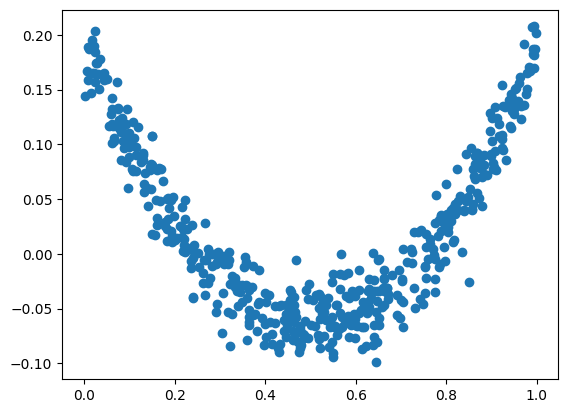

In [97]:
x = np.random.random((500, 1))

y = (x - 0.25) * (x - 0.75) + np.random.normal(0, 0.02, (500, 1))

plt.scatter(x, y)

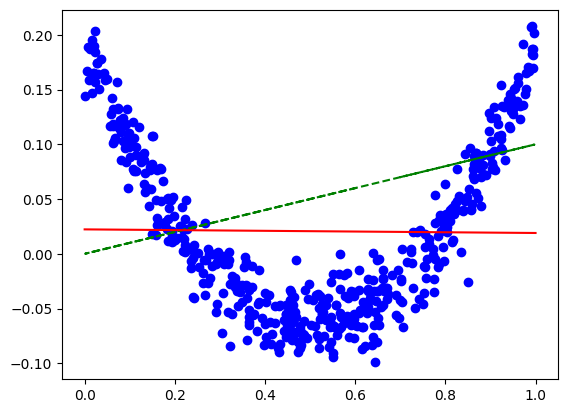

In [101]:
lr = LinearRegression()
lr.fit(x, y)

x_retta = np.linspace(0, 1, 10)
y_retta = lr.coef_[0] * x_retta + lr.intercept_


plt.scatter(x, y, c='b')
plt.plot(x, 0.1 * x, c='g', ls='--')
plt.plot(x_retta, y_retta, c='r')

In [104]:
X_2 = np.hstack([ x, x **2 , x ** 3, ... ])

In [105]:
lr = LinearRegression()
lr.fit(X_2, y)

LinearRegression()

In [106]:
lr.intercept_

array([0.18977674])

In [107]:
lr.coef_


array([[-1.00453923,  0.99888672]])

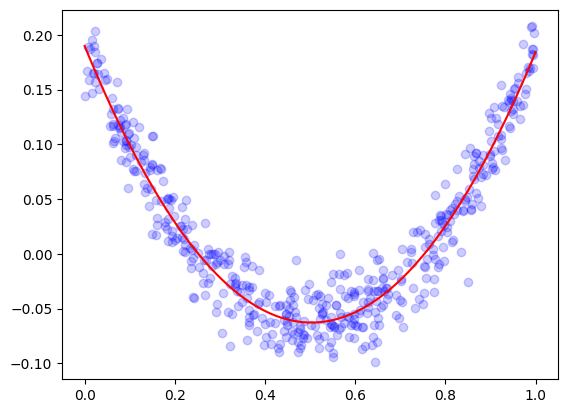

In [114]:
lr = LinearRegression()
lr.fit(X_2, y)

x_parab = np.linspace(0, 1, 100).reshape(-1,1)
x_parab_2 = np.hstack([ x_parab, x_parab ** 2 ])

y_parab = lr.predict(x_parab_2)

plt.scatter(x, y, c='b', alpha=0.2)
plt.plot(x_parab, y_parab, c='r')

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
pf = PolynomialFeatures(2, interaction_only=True, include_bias=False)

In [155]:
X

array([[0.83833152, 0.22284824],
       [0.09983831, 0.65087463],
       [0.32107949, 0.26580223],
       [0.97383051, 0.57802205],
       [0.76811384, 0.73586562],
       [0.20446916, 0.07120861],
       [0.41092981, 0.02979792],
       [0.7200546 , 0.90480777],
       [0.7559447 , 0.32848104],
       [0.33564037, 0.57693108],
       [0.55043396, 0.59485954],
       [0.58197866, 0.17222573],
       [0.00575503, 0.72878053],
       [0.91267788, 0.1411818 ],
       [0.34950918, 0.06165475],
       [0.22280478, 0.55084081],
       [0.97937545, 0.63166384],
       [0.58210342, 0.54844484],
       [0.61973521, 0.2849266 ],
       [0.37100305, 0.28503536],
       [0.03140111, 0.87913162],
       [0.76774129, 0.97472214],
       [0.7733154 , 0.46207811],
       [0.13677877, 0.97834661],
       [0.15773637, 0.97203377],
       [0.44021802, 0.31135592],
       [0.91555412, 0.42799507],
       [0.42613021, 0.7685965 ],
       [0.94301581, 0.27449378],
       [0.34727293, 0.43609061],
       [0.

In [158]:
pf.fit_transform(X)

array([[0.94386311, 0.70459938, 0.66504536],
       [0.92265391, 0.7565635 , 0.69804627],
       [0.61748891, 0.87523733, 0.54044934],
       ...,
       [0.29083189, 0.56884995, 0.1654397 ],
       [0.23212696, 0.87311368, 0.20267322],
       [0.91827302, 0.88705042, 0.81455447]])

In [157]:
X = np.random.random((500, 2))

In [ ]:
ss = StandardScaler()
pf = PolynomialFeatures(5)

X_ss = ss.fit_transform(X)
X_poly = pf.fit_transform(X_ss)

lr = LinearRegression()
lr.fit(X_poly, y)


In [159]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(5), LinearRegression())

In [160]:
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [161]:
pipe.predict(X)

array([[ 0.02295541],
       [ 0.02135509],
       [ 0.00567328],
       [ 0.01525688],
       [ 0.03375413],
       [ 0.02876721],
       [ 0.03474447],
       [ 0.03123628],
       [ 0.02257805],
       [ 0.01866004],
       [ 0.02241909],
       [ 0.00392915],
       [ 0.01843821],
       [ 0.02047522],
       [ 0.02279201],
       [ 0.02113526],
       [ 0.02787792],
       [ 0.03926873],
       [ 0.01390454],
       [ 0.02772143],
       [ 0.03025093],
       [ 0.00114472],
       [ 0.00042163],
       [-0.00231357],
       [ 0.02071389],
       [ 0.0147139 ],
       [ 0.02681439],
       [ 0.0242865 ],
       [ 0.01431889],
       [ 0.02381576],
       [ 0.03227937],
       [ 0.02235398],
       [ 0.04238033],
       [ 0.00978289],
       [ 0.02282846],
       [ 0.02483366],
       [-0.0368186 ],
       [ 0.0255734 ],
       [-0.00981514],
       [-0.00204331],
       [ 0.03900329],
       [ 0.04151228],
       [ 0.02774518],
       [ 0.04234332],
       [ 0.03094361],
       [ 0

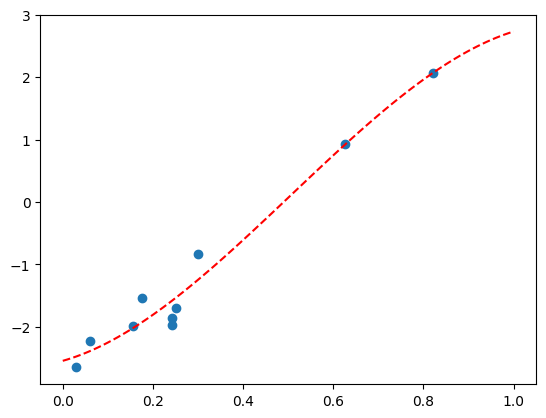

In [168]:
x = np.random.random(10)
y = x ** 3 + 2 * x ** 3 + 3 * x -2 + np.random.normal(0, 0.5, size=10)
plt.scatter(x, y)

pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())
pipe.fit(x.reshape(-1,1), y)

x_poly = np.linspace(0, 1, 100)
y_poly = pipe.predict(x_poly.reshape(-1,1))

plt.plot(x_poly, y_poly, ls='--', c='r')

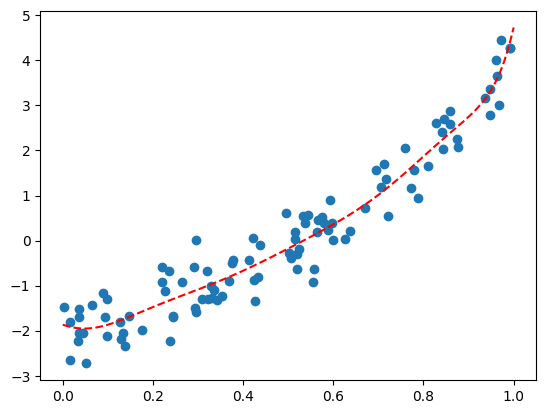

In [180]:
x = np.random.random(100)
y = x ** 3 + 2 * x ** 3 + 3 * x -2 + np.random.normal(0, 0.5, size=100)
plt.scatter(x, y)

pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
pipe.fit(x.reshape(-1,1), y)

x_poly = np.linspace(0, 1, 100)
y_poly = pipe.predict(x_poly.reshape(-1,1))

plt.plot(x_poly, y_poly, ls='--', c='r')

In [181]:
from sklearn.datasets import make_regression

In [304]:
X, y = make_regression(n_samples=10000, n_features=50, n_informative=10, noise=100.)

In [305]:
X.shape

(10000, 50)

In [306]:
y.shape

(10000,)

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [308]:
X_train.shape

(8000, 50)

In [309]:
X_test.shape

(2000, 50)

In [310]:
from sklearn.linear_model import Ridge, Lasso

In [311]:
lr = Lasso(alpha=50)

lr.fit(X_train, y_train)

Lasso(alpha=50)

In [312]:
r2_score(y_test, lr.predict(X_test))

0.4105861649952597

<BarContainer object of 50 artists>

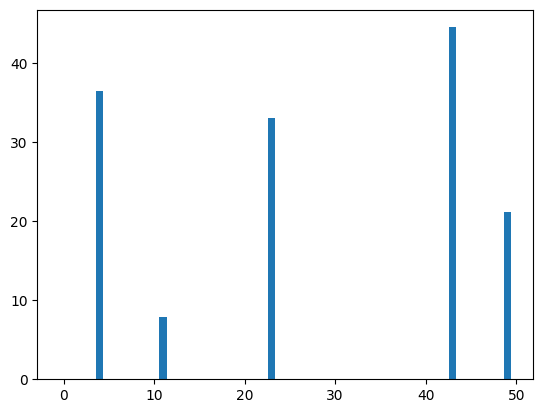

In [313]:
plt.bar(range(50), lr.coef_)

In [314]:
r2_list = []
for fi in [True, False]:
    for a in range(1, 50):
        reg = Lasso(fit_intercept=fi, alpha=a)
        reg.fit(X_train, y_train)
    
        r2 = r2_score(y_test, reg.predict(X_test))
        r2_list.append(r2)

In [318]:
len(r2_list)

98

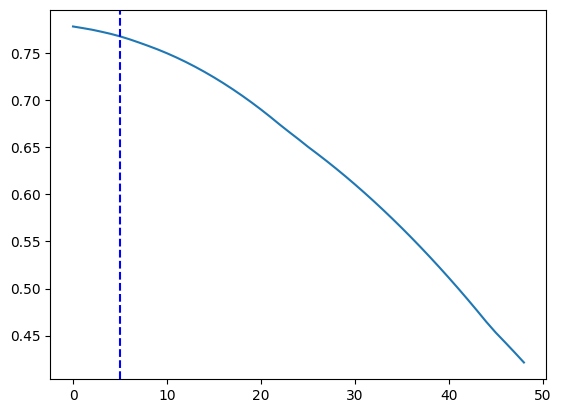

In [319]:
plt.plot(range(49), r2_list[:49])
plt.axvline(5, ls='--', c='b')

In [320]:
from sklearn.model_selection import GridSearchCV

In [321]:
params = {
    "alpha": [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
    "fit_intercept": [ True, False ]
}

In [327]:
gs = GridSearchCV(Lasso(), params, cv=5, scoring='r2', n_jobs=-1)

In [328]:
gs.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [329]:
gs.best_params_

{'alpha': 1, 'fit_intercept': False}

In [330]:
gs.best_score_

0.7794236955267276